# Loading the data, an example

In [62]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


There are two folders that contains the CSV data :

- Countries
- Continents

As their names suggest, Countries contains the data for different countries and Continents the data for different continents. The architecture is the same for both folders. For each country/continent, their are 4 subfolders :

- Nodes : contains the raw nodes data
- Edges : contains the raw edges data
- gml : contains the graphs in gml format
- PNG : contains images of the graphs (Blue nodes : stations, red nodes : generators, white nodes : joints)

In the folders Nodes and Edges there are two kinds of files :

- Highvoltage CSV file : contains raw data of the highvoltage network. This does NOT contain information on generators
- Heuristic CSV file : contains raw data of the whole networks. This contains information on generators. Be carefull, as it name suggests, these data come from heuristic algorithms that tries to make sense out of incomplete Openstreet data. The networks obtain should therefore be treated as approximation of the true networks.

Therefore, there are two kinds of graphs in the gml and PNG folders : highvoltage networks and Heuristic networks.

## The easy way

The easiest way to load the graphs is to use directly the gml files. NetworkX, one of the most used python library to handle graphs, has a method that reads gml files. In this example notebook, we assume that we want to load the heuristic graph of Spain.

In [60]:
import networkx as nx
geo        = 'Countries'   #Replace by Continents
country    = 'Austria'     #Replace by the country of interest

#Make sure the notebook is in the right folder
path_nodes_gml = './%s/%s/gml/%s_heuristic.gml'%(geo,country,country)

In [61]:
G = nx.read_gml(path_nodes_gml)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe2 in position 0: ordinal not in range(128)

## The hard way

The other way to load the graphs is to work directly with the raw CSV files. These data were cleaned but still contain some bugs.

### Nodes data

In [8]:
path_nodes = './%s/%s/Nodes/heuristic_vertices.csv'%(geo,country)

In [25]:
#For most files it is possible (and easier) to load it directly in pandas
#But some files may have bugs and some nodes/lines should be discarded
import csv
nodes=[]
with open(path_nodes, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter='#') #delimiters were chosen to be #
    columns_nodes = reader.next()
    columns_nodes = [ c.replace('_','') for c in columns_nodes ] #Get rid of _ for the column names
    print columns_nodes

    for row in reader:
        if len(row)==len(columns_nodes):
            nodes.append(row)

['vid', 'lon', 'lat', 'typ', 'voltage', 'frequency', 'name', 'operator', 'ref', 'source', 'ngen', 'capacity', 'netcapacity', 'wktsrid4326']


In [79]:
np.unique(nodes['name'].values)

array(['', "'Central Hidroel\xc3\xa8ctrica d''Espot'",
       "'Central T\xc3\xa8rmica d''es Murterar'",
       "'Central d''es Bessons'", "'Central el\xc3\xa8ctrica d''Adrall'",
       "'Central hidroel\xc3\xa8ctrica d''Esterri d''\xc3\x80neu'",
       "'Central hidroel\xc3\xa8ctrica d''Oliana'",
       "'Estaci\xc3\xb3 de So n''Orlandis'",
       "'Estaci\xc3\xb3 receptora d''Olot'",
       "'Estaci\xc3\xb3 transformadora de Santa Llogaia d''\xc3\x80lguema'",
       "'Parc fotovolt\xc3\xa0ic d''Es Gallicant'",
       "'Subcentral d''Art\xc3\xa0;planta fotovoltaica de Bellpuig'",
       "'Subestaci\xc3\xb3 d''Albat\xc3\xa0rrec'",
       "'Subestaci\xc3\xb3 d''Inca'",
       "'Subestaci\xc3\xb3 de Castell d''Aro'",
       "'Subestaci\xc3\xb3 de Santa Llogaia d''\xc3\x80lguema'",
       "'Subestaci\xc3\xb3n d''Alzira'",
       "'Subestaci\xc3\xb3n d''Arr\xc3\xbabal'",
       "'Subestaci\xc3\xb3n d''Euba'", "'Subestaci\xc3\xb3n de l''Albal'",
       "'l''Hort Solar;l''Hort Solar'",
     

In [26]:
import pandas as pd
#Loading the nodes in a Pandas Dataframe
nodes = pd.DataFrame(nodes, columns=columns_nodes)
print nodes.head(2)

   vid                lon               lat          typ voltage frequency  \
0  886  -8.40369582481532   43.303381147808  sub_station                     
1  887  -8.40595158432527  43.3038866774614  sub_station                     

  name operator ref source ngen capacity netcapacity  \
0                                                      
1                                                      

                                         wktsrid4326  
0  SRID=4326;POINT(-8.40369582481532 43.303381147...  
1  SRID=4326;POINT(-8.40595158432527 43.303886677...  


In [27]:
#Convert ID, longitude, and latitude to proper types
#Similar operations can be done for the other columns if needed
nodes['vid'] = nodes['vid'].apply(lambda x:int(x))
nodes['lat'] = nodes['lat'].apply(lambda x:float(x))
nodes['lon'] = nodes['lon'].apply(lambda x:float(x))

In [28]:
#Node types present in this example
print np.unique(nodes['typ'].values)

['generator' 'heliostat' 'joint' 'merge' 'merged_generator' 'plant'
 'station' 'sub_station' 'substation']


### Edge data

In [29]:
path_edges = './%s/%s/Edges/heuristic_links.csv'%(geo,country)
edges=[]
with open(path_edges, 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter='#')
    columns_edges = reader.next()
    columns_edges = [ c.replace('_','') for c in columns_edges ] #Get rid of _ for the column names
    print columns_edges

    for row in reader:
        if len(row)==len(columns_edges):
            edges.append(row)

['lid', 'vid1', 'vid2', 'voltage', 'cables', 'wires', 'frequency', 'name', 'operator', 'ref', 'lengthm', 'rohmkm', 'xohmkm', 'cnfkm', 'ithmaxa', 'fromrelation', 'wktsrid4326', 'type']


In [85]:
np.unique(edges['rohmkm'].values)

array([''], dtype=object)

In [30]:
edges = pd.DataFrame(edges, columns=columns_edges)
print edges.head(2)

   lid   vid1   vid2 voltage cables wires frequency name  \
0   26  35719  36090                                       
1  108    998   2219  400000      3                        

                  operator ref           lengthm rohmkm xohmkm cnfkm ithmaxa  \
0                               1882.57663009941                               
1  Red Eléctrica de España      320.544334846127                               

  fromrelation                                        wktsrid4326  type  
0           ''  SRID=4326;LINESTRING(-5.38161576288933 36.1913...  line  
1           ''  SRID=4326;LINESTRING(-1.97534634695199 43.2561...  line  


In [31]:
#Convert IDs to proper types
#Similar operations can be done for the other columns if needed
edges['lid']  = edges['lid'].apply(lambda x:int(x))
edges['vid1'] = edges['vid1'].apply(lambda x:int(x))
edges['vid2'] = edges['vid2'].apply(lambda x:int(x))

### Building the graph

In [34]:
G = nx.Graph()
G.add_nodes_from(nodes['vid'].values)

#Load the nodes data in the graph
for col in columns_nodes:
    if col != 'vid':
        nx.set_node_attributes(G, col, 
                               {k:str(v) for k,v in zip( nodes['vid'].values, 
                                                         nodes[col].values)})

In [37]:
print G.nodes(data=True)[0]

(32770, {'capacity': '', 'name': '', 'source': '', 'ref': '', 'lon': '-0.351599973384', 'operator': '', 'ngen': '', 'frequency': '50', 'voltage': '66000', 'lat': '39.363043836', 'wktsrid4326': 'SRID=4326;POINT(-0.351599973383682 39.363043836042)', 'typ': 'joint', 'netcapacity': ''})


In [38]:
G.add_edges_from([(n1,n2) for n1,n2 in zip(edges['vid1'].values, 
                                           edges['vid2'].values)])
#Load the edges data in the graph
for col in edges.columns:
    if 'vid' not in col:
        nx.set_edge_attributes(G, col, 
                               {(a,b):str(v) for a,b,v in zip(edges['vid1'], 
                                                              edges['vid2'],
                                                              edges[col])})

In [40]:
print G.edges(data=True)[0]

(32770, 2376, {'lid': '30552', 'ithmaxa': '', 'wires': '1;1;1;1', 'xohmkm': '', 'name': '', 'ref': '', 'fromrelation': "''", 'cnfkm': '', 'frequency': '50;50;50', 'voltage': '', 'lengthm': '6370.82780549564', 'type': 'line', 'operator': '', 'wktsrid4326': 'SRID=4326;LINESTRING(-0.351599973383682 39.363043836042,-0.37610751105755 39.4031897642755)', 'cables': '6;6;3;6', 'rohmkm': ''})


### Generators, substations, and joints

In [41]:
#It might be the case that nodes were created without having a type field
#Here, we filter these nodes out of the graph
G.remove_nodes_from( 
    [node[0] for node in G.nodes(data=True) if not node[1].has_key('typ')] )

We create the three following lists :

- generators : contains the IDs of nodes considered as generators
- stations : contains the IDs of nodes considered as substations
- others : contains the IDs of nodes that are not generators or substations (mainly joints)

In [42]:
generators = [node[0] for node in G.nodes(data=True) 
                        if node[1]['typ']=='generator' or
                           node[1]['typ']=='merged_generator' or
                           node[1]['typ']=='plant' or
                           node[1]['typ']=='hydro' or
                           node[1]['typ']=='hydroelectric' or
                           node[1]['typ']=='heliostat']

In [43]:
stations = [node[0] for node in G.nodes(data=True) 
                        if node[1]['typ']=='station' or
                           node[1]['typ']=='sub_station' or
                           node[1]['typ']=='substation']

In [44]:
others = [node[0] for node in G.nodes(data=True) if node[0] not in generators and 
                                                    node[0] not in stations]

In [49]:
assert len(generators) + len(stations) + len(others) == len(G.nodes())
print """G contains %d nodes and %d edges.
There are %d generators, 
          %d substations, and 
          %d joints"""%(G.number_of_nodes(),
                        G.number_of_edges(),
                        len(generators),len(stations),len(others))

G contains 9425 nodes and 9913 edges.
There are 6998 generators, 
          1360 substations, and 
          1067 joints


### Ploting the graph

In this section, we plot the graph using the basemap module.

In [50]:
#Returns the longitude of a given node
def get_longitude( node_id ):
    return nodes.ix[ nodes['vid'] == node_id, 'lon'].values[0]

#Returns the latitude of a given node
def get_latitude( node_id ):
    return nodes.ix[ nodes['vid'] == node_id, 'lat'].values[0]

The following function gets the coordinates for the bounding box. These coordinates are stored in a text file called "Bounding_Boxes.txt" located at the root of the project folder. The coordinates are in mercator projection and the format of the text file is the following :

name;x1;x2;y1;y2

Where :

- name stands for the country/continent name
- x1 stands for the lower left corner longitude
- x2 stands for the upper right corner longitude
- y1 stands for the lower left corner latitude
- y2 stands for the upper right corner latitude

In [51]:
def get_bb(country):
    try:
        with open('./Bounding_Boxes.txt', 'r') as f:
            bb = map(int, filter(lambda x:country in x, f.readlines())[0].split(';')[1:])
        return bb
    except:
        print 'error while loading bounding box coordinates'
        return None

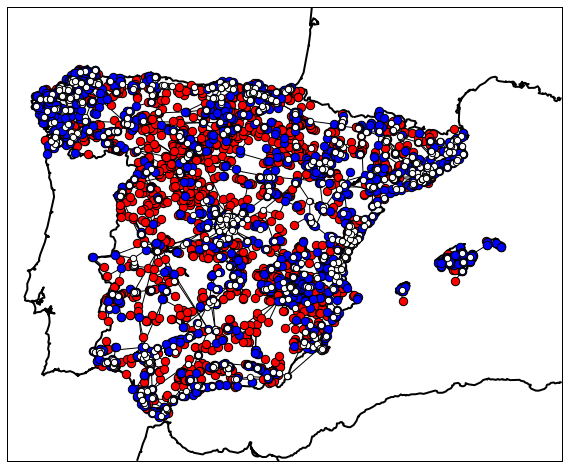

In [53]:
from mpl_toolkits.basemap import Basemap

fig = plt.figure(figsize=(8,8))
plt.subplots_adjust(left=0.05,right=0.95,top=0.90,bottom=0.05,wspace=0.15,hspace=0.05)
ax = plt.subplot(111)

#Bounding box
x1, x2, y1, y2 = get_bb(country)

m = Basemap(resolution='i',
            projection='merc', 
            llcrnrlat=y1,
            urcrnrlat=y2,
            llcrnrlon=x1,
            urcrnrlon=x2,
            lat_ts=20)

m.drawcountries(linewidth=2)
m.drawcoastlines(linewidth=2)

pos = dict((int(node), 
            m(get_longitude( int(node) ), 
              get_latitude( int(node) )) ) for node in G.nodes())

nx.draw_networkx_nodes(G, pos, nodelist=generators, node_size = 70, node_color = 'r')
nx.draw_networkx_nodes(G, pos, nodelist=stations,   node_size = 70, node_color = 'b')
nx.draw_networkx_nodes(G, pos, nodelist=others,     node_size = 40, node_color = 'w')

nx.draw_networkx_edges( G, pos)

plt.tight_layout()
plt.show()